<h1>OCD Project</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>Upload and Clean SurveyI SurveyII SurveyII</b>

In [2]:
TextFileReader1 = pd.read_csv(r'SurveyI.csv',error_bad_lines=False,chunksize=1000)

df1List = []
for df in TextFileReader1:
    df1List.append(df)
    
df1 = pd.concat(df1List,sort=False)
df1 = df1.replace(' ',-1)
df1 = df1.astype('int64',errors='ignore')
df1 = df1.apply(lambda x: x.astype('int64',errors='ignore'))
df1 = df1.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

In [3]:
TextFileReader2 = pd.read_csv(r'SurveyII.csv',error_bad_lines=False,chunksize=1000)

dfList2 = []
for df in TextFileReader2:
    dfList2.append(df)
    
df2 = pd.concat(dfList2,sort=False)
df2 = df2.replace(' ',-1)
df2 = df2.astype('int64',errors='ignore')
df2 = df2.apply(lambda x: x.astype('int64',errors='ignore'))
df2 = df2.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

In [4]:
TextFileReader3 = pd.read_csv(r'SurveyIIInew.csv',error_bad_lines=False,chunksize=1000)

dfList3 = []
for df in TextFileReader3:
    dfList3.append(df)
    
df3 = pd.concat(dfList3,sort=False)
df3 = df3.replace(' ',-1) #updating null values to -1
df3 = df3.astype('int64',errors='ignore')
df3 = df3.apply(lambda x: x.astype('int64',errors='ignore'))
df3 = df3.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

<h4>Counts of People reported to have OCD</h2>

In [5]:
print("Survey I")
print(df1['NQ31B1'].value_counts())
print("Survey II")
print(df2['NQ31B1'].value_counts())
print("Survey III")
print(df3['NQ31B1'].value_counts())

Survey I
 1    366332
-1      5616
 2      3123
 3      1604
 5      1494
 4      1061
 6       354
Name: NQ31B1, dtype: int64
Survey II
 1    482168
-1      7300
 2      4972
 5      2215
 3      2160
 4      1573
 6       472
Name: NQ31B1, dtype: int64
Survey III
 1    407583
-1      5734
 2      5658
 3      2505
 5      2435
 4      2073
 6       437
Name: NQ31B1, dtype: int64


<h4>Removing Data Points with implausible height weight and BMI</h4>

In [6]:
#height
df1['NQ49'] = df1.NQ49_FT * 12 + df1.NQ49_IN

In [7]:
df1_bool = ((df1['NQ49'] >= 47.2441) & (df1['NQ49'] <= 82.6772) & (df1['NQ50'] >= 77.16) & (df1['NQ50'] <= 396.832) & (df1['BMI'] >= 16) & (df1['BMI'] <= 65))
print("Data before trim: " + str(len(df1)))
print("Data after trim: " + str(len(df1[df1_bool])))
df1 = df1[df1_bool]

Data before trim: 379584
Data after trim: 363940


In [8]:
df2_bool = ((df2['NQ49'] >= 47.2441) & (df2['NQ49'] <= 82.6772) & (df2['NQ50'] >= 77.16) & (df2['NQ50'] <= 396.832) & (df2['BMI'] >= 16) & (df2['BMI'] <= 65))
print("Data before trim: " + str(len(df2)))
print("Data after trim: " + str(len(df2[df2_bool])))
df2 = df2[df2_bool]

Data before trim: 500860
Data after trim: 482185


In [9]:
df3_bool = ((df3['NQ49'] >= 47.2441) & (df3['NQ49'] <= 82.6772) & (df3['NQ50'] >= 77.16) & (df3['NQ50'] <= 396.832) & (df3['BMI'] >= 16) & (df3['BMI'] <= 65))
print("Data before trim: " + str(len(df3)))
print("Data after trim: " + str(len(df3[df3_bool])))
df3 = df3[df3_bool]

Data before trim: 426425
Data after trim: 396260


<h4>Merge Data Frames</h4>

In [10]:
data_ocd = pd.concat([df1,df2,df3],axis=0,sort = True).reset_index()

In [11]:
#removing columns with more than 10% of null values
data_ocd = data_ocd.loc[:, data_ocd.isnull().mean() < .1]

<h4>Delete Unanswered Responses</h4>

In [12]:
data_ocd = data_ocd[data_ocd['NQ31B1'] != -1] #OCD Column

<h4>Total survey results</h4>

In [13]:
data_ocd['NQ31B1'].value_counts()

1    1205838
2      12951
3       5864
5       5808
4       4437
6       1075
Name: NQ31B1, dtype: int64

<h4>After Deleting Unanswered Responses</h4>

In [42]:
data_ocd[data_ocd['HBCU']==-1]['HBCU'] = 0
data_ocd[data_ocd['HHE']==-1]['HHE'] = 0
data_ocd[data_ocd['HS']==-1]['HS'] = 0


/Users/hojinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/hojinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hojinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

<h4>Create Label for Plot</h4>

In [15]:
label_ = []
k = 0
j = 2008
for i in range(18,40):
    if(k == 0):
        label_.append("Fall" + str(j))
        k = 1
        j += 1
    else:
        label_.append("Spring" + str(j))
        k = 0
        
label_

['Fall2008',
 'Spring2009',
 'Fall2009',
 'Spring2010',
 'Fall2010',
 'Spring2011',
 'Fall2011',
 'Spring2012',
 'Fall2012',
 'Spring2013',
 'Fall2013',
 'Spring2014',
 'Fall2014',
 'Spring2015',
 'Fall2015',
 'Spring2016',
 'Fall2016',
 'Spring2017',
 'Fall2017',
 'Spring2018',
 'Fall2018',
 'Spring2019']

<h4>OCD Rate Between Terms</h4>

In [16]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value*100)
        #label = str(label * 100) + "%"
        
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for


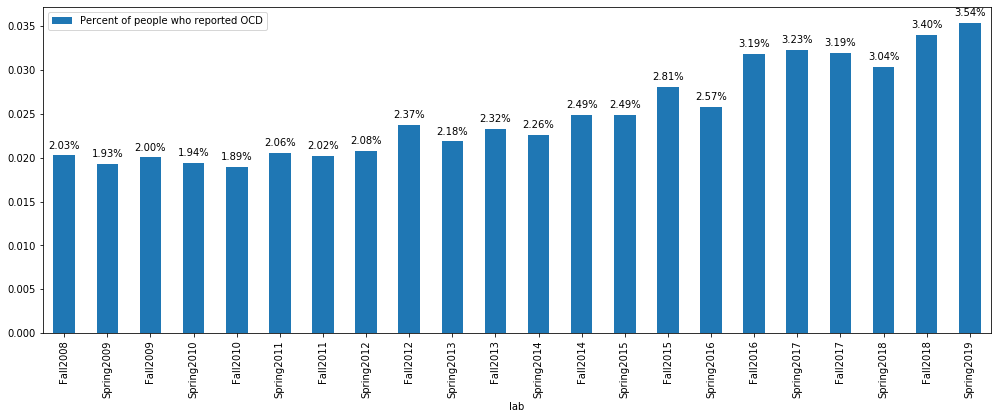

In [17]:
def plot_ocd_ratio(data_ocd):  
    
    ratio = []
    
    for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
        data = data_ocd[(data_ocd['STUDY'] == answer)]
        ratio.append(data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() / len(data.NQ31B1))

    ocd_plot = pd.DataFrame({'lab':label_, 'val':ratio})
    #plt.bar(ocd_plot,label="Percent of people who reported OCD",figsize=(18,6))
    ax = ocd_plot.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4")
    add_value_labels(ax)
    
    return ocd_plot, ratio

ocd_plot, ratio = plot_ocd_ratio(data_ocd)

<h2>Curve Fitting</h2>

In [18]:
def trendline(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)

slope = trendline(pd.Series(ocd_plot['val']))
print(slope)

0.0007746875207496573


In [19]:
term = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
curve = pd.DataFrame({'lab':term, 'val':ratio})

Exponential Curve Fitting

array([-4.29060548e+02,  1.80560866e-06,  4.29077427e+02])

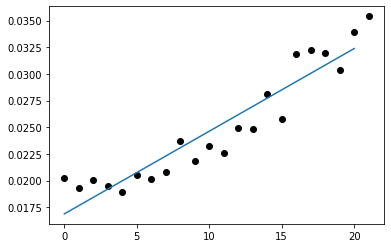

In [20]:
from pylab import *
from scipy.optimize import curve_fit
def func(x, a, c, d):
    return a*np.exp(-c*x)+d
def func2(x, a, b):
    return a*x+b
popt, pcov = curve_fit(func, term, ratio, p0=(1, 1e-6, 1))
xx = np.linspace(0, 20,1000)
yy = func(xx, *popt)
plt.plot(term,ratio,'ko')
plt.plot(xx, yy)
popt

Linear Regression

array([0.00077469, 0.0168801 ])

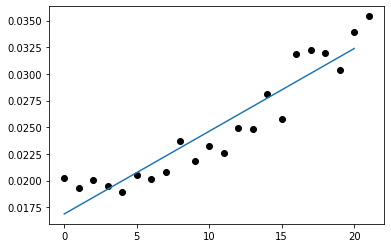

In [21]:
def func2(x, a, b):
    return a*x+b
popt, pcov = curve_fit(func2, term, ratio, p0=(1, 2))
xx = np.linspace(0, 20,1000)
yy = func2(xx, *popt)
plt.plot(term,ratio,'ko')
plt.plot(xx, yy)
popt

Conclusion: A linear fit seems like the correct fit to use

In [22]:
import statsmodels.api as sm
curve['intercept']=1
lm=sm.OLS(curve['val'],curve[['intercept','lab']])
slr_results = lm.fit()
slr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     148.6
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.03e-10
Time:                        19:22:51   Log-Likelihood:                 107.78
No. Observations:                  22   AIC:                            -211.6
Df Residuals:                      20   BIC:                            -209.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0169      0.001     21.648      0.000       0.015       0.019
lab            0.0008   6.36e-05     12.188      0.000       0.001       0.001
==============================================================================
Omnibus:                        3.559   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                1.426
Skew:                           0.151   Prob(JB):                        0.490
Kurtosis:                       1.790   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0: B = 0 Year has no effect on OCD rates. 

H1: B > 0 Year has positive linear relationship with OCD rates. 

The p value for the is very small. For a one sided test 

<h2>Dickey-Fuller test</h2>

Ho: Time series is non-stationary

H1: Time series is stationary

In [23]:
from statsmodels.tsa.stattools import adfuller

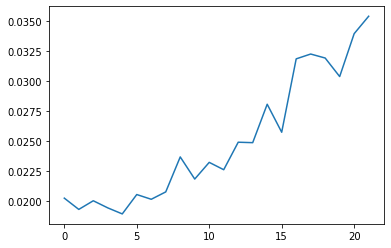

In [24]:
plt.plot(curve['val'])

In [25]:
X = curve['val'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time series is Non-Stationary")

ADF Statistic: -0.535239
p-value 0.884954
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Failed to Reject Ho - Time series is Non-Stationary


<h4>Stacked Bar Chart</h4>

In [26]:
data_ocd['Treated'] = 2
data_ocd.loc[data_ocd['NQ31B1'] == -1,'Treated'] = 0
data_ocd.loc[data_ocd['NQ31B1'] == 1,'Treated'] = 0
data_ocd.loc[data_ocd['NQ31B1'] == 2,'Treated'] = 1
data_ocd.Treated.value_counts()

0    1205838
2      17184
1      12951
Name: Treated, dtype: int64

In [27]:
study_value = data_ocd['STUDY'].value_counts(sort=False)
pivot_df = data_ocd[data_ocd.Treated != 0].pivot_table(index = ['STUDY'],columns=['Treated'],aggfunc = 'size',observed=True)
pivot_df = pivot_df.div(study_value,axis=0)
pivot_df = pivot_df.multiply(100)

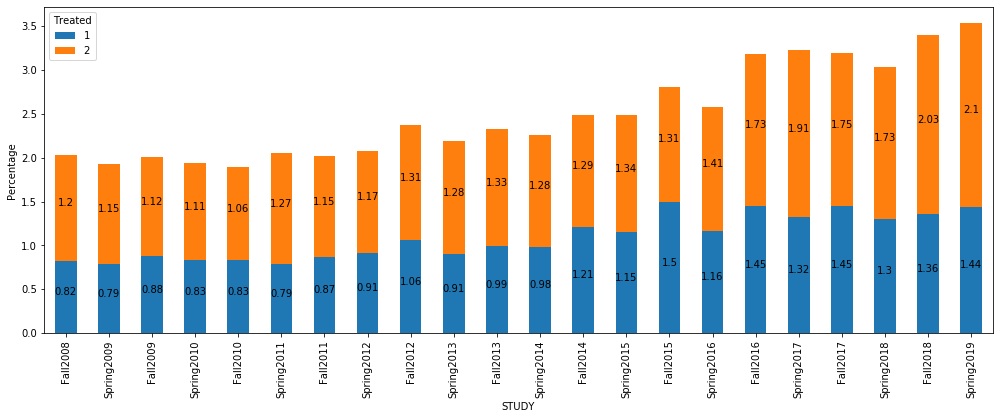

In [28]:
ax = pivot_df.plot.bar(stacked=True,figsize=(17,6))
ax.set_xticklabels(label_)
ax.set_ylabel("Percentage")
height_prev = np.zeros(22)
#print(len(height_prev))
#print(height_prev)
patch = 0
for i in range(1,3):
    #print(height_prev)
    j = 0
    for rec, label in zip(ax.patches,pivot_df[i].round(2).astype(str)): 
        #print(rec)
        height = rec.get_height()
        height = ax.patches[patch].get_height()
        #print(height,height_prev[j],(height/2 + height_prev[j]))
        ax.text(rec.get_x() + rec.get_width() / 2, (height/2 + height_prev[j]), label,
               ha = 'center', va='bottom')
        #print(height,height_prev[j])
        height_prev[j] = height + height_prev[j]
        j += 1
        patch += 1

ax.set_xticklabels(label_);

In [29]:
import statsmodels.api as sm
from scipy import stats

X_1 = np.array(range(len(pivot_df[1]))).reshape(-1,1)
y_1 = pivot_df[1].values
y_2 = pivot_df[2].values

X2 = sm.add_constant(X_1)
est_1 = sm.OLS(y_1, X2)
est_2 = sm.OLS(y_2, X2)
est1 = est_1.fit()
est2 = est_2.fit()
print(est1.summary())
print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     96.19
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           4.38e-09
Time:                        19:22:53   Log-Likelihood:                 19.211
No. Observations:                  22   AIC:                            -34.42
Df Residuals:                      20   BIC:                            -32.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7241      0.044     16.574      0.0

#### Basically, to ask the question, as more people are reporting OCD are they also getting treatment?

## Logistic Regression

In [30]:
for column in data_ocd.columns:
    if data_ocd[column].dtypes == 'int64':
        data_ocd[column] = data_ocd[column].astype('category')


In [31]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate
import pandas as pd
import numpy as np

In [ ]:
##remember to sample 

X = data_ocd.loc[:, data_ocd.columns != 'NQ31B1']
y = data_ocd.NQ31B1
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
log_reg_model = LogisticRegression(solver = 'saga', penalty='l1', C=0.01)
log_reg_model.fit(X_train, y_train)

# use the model to make predictions with the test data
#y_test = y_test.reshape(-1, 1)
y_pred = log_reg_model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print(tabulate( pd.DataFrame(sorted(zip(X_train.columns, model.coef_[0]),
      key = lambda x:x[1],
      reverse=True)[:15]), tablefmt='psql'))


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

random_forest = RandomForestClassifier(n_estimators = 2)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print(tabulate(
    pd.DataFrame( sorted(zip(X_train.columns, sel.estimator_.feature_importances_),
      key = lambda x:x[1],
      reverse=True)[:15]) , tablefmt='psql'))



Misclassified samples: 101
Accuracy: 0.99
+----+---------+------------+
|  0 | Treated | 0.52722    |
|  1 | NQ31A2  | 0.0371288  |
|  2 | NQ31B2  | 0.0236196  |
|  3 | NQ31A6  | 0.0198476  |
|  4 | PERMID  | 0.019452   |
|  5 | BMI     | 0.0189266  |
|  6 | NQ50    | 0.0167436  |
|  7 | NQ49    | 0.0167392  |
|  8 | NQ31B3  | 0.0154521  |
|  9 | BAC     | 0.0147836  |
| 10 | STUDY   | 0.0147171  |
| 11 | NQ46    | 0.0133245  |
| 12 | NQ65G   | 0.0121498  |
| 13 | NQ51    | 0.0101401  |
| 14 | NQ31A3  | 0.00921356 |
+----+---------+------------+


## Cramer's V

In [43]:
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
import scipy.stats as ss
import operator

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

corDict = {}
for col in list(data_ocd.select_dtypes(include=['category']).columns):
    column = [col, "NQ31B1"]
    temp_crammer = data_ocd[(data_ocd[col] != -1) & (~data_ocd[col].isnull())]
    if not temp_crammer.empty:
        confusion_matrix = pd.crosstab(temp_crammer[col], temp_crammer["NQ31B1"]).as_matrix()
        corDict[col] = cramers_v(confusion_matrix)
    
sorted_d = sorted(corDict.items(), key=operator.itemgetter(1), reverse=True)

print(tabulate(pd.DataFrame(sorted_d[0:16]), tablefmt='psql'))

/Users/hojinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/hojinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


+----+--------+----------+
|  0 | NQ31B1 | 1        |
|  1 | NQ65G  | 0.240988 |
|  2 | NQ31B2 | 0.219023 |
|  3 | NQ31A2 | 0.213537 |
|  4 | NQ31B3 | 0.213232 |
|  5 | NQ34B  | 0.212883 |
|  6 | NQ31B4 | 0.170253 |
|  7 | NQ31A6 | 0.163932 |
|  8 | NQ34C  | 0.157631 |
|  9 | NQ34A  | 0.145421 |
| 10 | NQ31A4 | 0.141073 |
| 11 | NQ31B6 | 0.137707 |
| 12 | NQ31A7 | 0.125315 |
| 13 | NQ31A3 | 0.125052 |
| 14 | NQ31B7 | 0.124918 |
+----+--------+----------+


In [52]:
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
import scipy.stats as ss
import operator

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        #cat_measures[np.isnan(cat_measures)] = 0
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

corDict = {}
for col in list(data_ocd.select_dtypes(exclude=['category']).columns):
    
    eta = correlation_ratio(data_ocd["NQ31B1"], data_ocd[col])
    corDict[col] = eta
    
sorted_d = sorted(corDict.items(), key=operator.itemgetter(1), reverse=True)

print(tabulate(pd.DataFrame(sorted_d[0:16]), tablefmt='psql'))

+---+------+-------------+
| 0 | BAC  | 0.000515665 |
| 1 | NQ49 | 0.00045962  |
| 2 | BMI  | 0.000153547 |
| 3 | NQ46 | 0.000145523 |
| 4 | NQ50 | 6.07541e-05 |
+---+------+-------------+


<h1> Update: Up to Here </h1>

In [ ]:
study_value = data_ocd['STUDY'].value_counts(sort=False)

In [ ]:
pivot_df = data_ocd[data_ocd.NQ31B1 != 1].pivot_table(index = ['STUDY'],columns=['NQ31B1'],aggfunc = 'size',observed=True)

In [ ]:
pivot_df = pivot_df.div(study_value,axis=0)

In [ ]:
pivot_df = pivot_df.multiply(100)

In [ ]:
ax = pivot_df.plot.bar(stacked=True,figsize=(17,6))
ax.set_xticklabels(label)
ax.set_ylabel("Percentage")
height_prev = np.zeros(21)
#print(len(height_prev))
#print(height_prev)
patch = 0
for i in range(2,7):
    #print(height_prev)
    j = 0
    for rec, label in zip(ax.patches,pivot_df[i].round(2).astype(str)): 
        #print(rec)
        height = rec.get_height()
        height = ax.patches[patch].get_height()
        #print(height,height_prev[j],(height/2 + height_prev[j]))
        ax.text(rec.get_x() + rec.get_width() / 2, (height/2 + height_prev[j]), label,
               ha = 'center', va='bottom')
        #print(height,height_prev[j])
        height_prev[j] = height + height_prev[j]
        j += 1
        patch += 1


ax.set_xticklabels(label_);

<h4>OCD Report By Year</h4>

In [ ]:
label_year = []
for i in range(2008,2019):
    label_year.append(i)
label_year

In [ ]:
def ocd_year(data_ocd):  
    
    ratio = []
    temp_prevalence = 0
    temp_length = 0
    
    for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
        data = data_ocd[(data_ocd['STUDY'] == answer)]
        temp_prevalence += data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() 
        temp_length += len(data.NQ31B1)
        if(answer % 2 == 0):
            ratio.append(temp_prevalence * 1.0 / temp_length)
            temp_prevalence = 0
            temp_length = 0

    ocd_plot = pd.DataFrame({'lab':label_year, 'val':ratio})
    #plt.bar(ocd_plot,label="Percent of people who reported OCD",figsize=(18,6))
    ax = ocd_plot.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4")
    add_value_labels(ax)

ocd_year(data_ocd)

<h4>Seasonal Trends</h4>

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 20))

def ocd_year(data_ocd):  
    
    ratio_Fall = []
    ratio_Spring = []
    
    for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
        data = data_ocd[(data_ocd['STUDY'] == answer)]
        if(answer % 2 == 0): # Fall
            ratio_Fall.append(data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() / len(data.NQ31B1))
        else:
            ratio_Spring.append(data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() / len(data.NQ31B1))
    
    plot_fall = pd.DataFrame({'lab':label[::2], 'val':ratio_Fall})
    plot_fall.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4", ax = axes[0])
    add_value_labels(axes[0])
    
    label_Spring = label[1::2]
    label_Spring.insert(0,"")
    ratio_Spring.insert(0,0)
    plot_spring = pd.DataFrame({'lab':label_Spring, 'val':ratio_Spring})
    plot_spring.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4", ax = axes[1])
    add_value_labels(axes[1])
    fig.tight_layout()
    
ocd_year(data_ocd)

<b>Graph of responses per year</b>

In [ ]:
fig, axes = plt.subplots(3, 7, figsize=(15, 6))
i = 0
j = 0
for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
    data = data_ocd[(data_ocd['STUDY'] == answer)]
    data = data.groupby(['NQ31B1']).STUDY.sum()
    left=  [k[0] for k in enumerate(data)]
    right=  [k[1] for k in enumerate(data)]
    axes[j,i].bar(left,right,label= (label[7*j + i]),log=True)
    axes[j,i].set_xticks(left, minor=False)
    axes[j,i].set_xticklabels(data.index.values)
    axes[j,i].legend(loc='best')
    if(i == 6):
        i = 0
        j += 1
    else:
        i += 1
    

<h4>Graph Percentages of responses by year</h4>

In [ ]:
fig, axes = plt.subplots(3, 7, figsize=(15, 6))
i = 0
j = 0
for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
    data = data_ocd[(data_ocd['STUDY'] == answer)]
    data = data.groupby(['NQ31B1']).STUDY.sum() / sum(data.groupby(['NQ31B1']).STUDY.sum()) * 100
    left=  [k[0] for k in enumerate(data)]
    right=  [k[1] for k in enumerate(data)]
    axes[j,i].bar(left,right,label= (label[7*j + i]))
    axes[j,i].set_xticks(left, minor=False)
    axes[j,i].set_xticklabels(data.index.values)
    axes[j,i].legend(loc='best')
    axes[j,i].set_ylim(0,3)
    if(i == 6):
        i = 0
        j += 1
    else:
        i += 1
    

<h4>Drop all columns that aren't in all the datasets</h4>

In [ ]:
data_ocd = data_ocd.dropna(axis=1)

In [ ]:
data_ocd.info()